In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv',index_col = 0)

In [3]:
train.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
5,37,Male,1.8,0.8,215,53,58,6.4,3.8,1.40,1
6,37,Male,0.8,0.2,195,60,40,8.2,5.0,1.50,2
7,55,Male,0.8,0.2,482,112,99,5.7,2.6,0.80,1
8,33,Male,0.9,0.8,680,37,40,5.9,2.6,0.80,1
9,58,Female,1.7,0.8,1896,61,83,8.0,3.9,0.95,1


In [9]:
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Code,Dataset
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10,1,1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1,1
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40,0,1
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34,1,1
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00,1,1


In [91]:
test.shape

(117, 11)

In [12]:
train.shape

(466, 11)

In [10]:
test.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Gender_Code                   0
Dataset                       0
dtype: int64

In [11]:
train['Albumin_and_Globulin_Ratio'].value_counts(dropna=False)

1.00    84
0.90    47
0.80    47
1.10    37
0.70    37
1.20    33
0.50    26
0.60    26
1.30    18
1.40    15
0.40    12
1.50     9
1.60     5
0.30     4
1.80     3
1.70     3
1.38     3
0.96     3
NaN      3
0.75     3
1.85     2
0.95     2
0.92     2
2.50     2
0.52     2
0.69     1
1.25     1
1.39     1
0.93     1
1.16     1
        ..
0.62     1
1.18     1
0.39     1
0.53     1
0.71     1
1.58     1
1.36     1
0.64     1
0.37     1
1.27     1
0.68     1
0.55     1
0.76     1
1.55     1
0.58     1
1.34     1
0.89     1
0.61     1
0.35     1
0.48     1
2.80     1
1.90     1
1.66     1
1.09     1
0.78     1
0.46     1
1.72     1
1.06     1
0.87     1
1.03     1
Name: Albumin_and_Globulin_Ratio, Length: 63, dtype: int64

In [12]:
median_train = train['Albumin_and_Globulin_Ratio'].median()

In [13]:
median_test = test['Albumin_and_Globulin_Ratio'].median()

In [14]:
train['Albumin_and_Globulin_Ratio'] = train['Albumin_and_Globulin_Ratio'].fillna(median_train)
test['Albumin_and_Globulin_Ratio'] = test['Albumin_and_Globulin_Ratio'].fillna(median_test)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_gender = LabelEncoder()
train['Gender_Code'] = le_gender.fit_transform(train['Gender'])
test['Gender_Code'] = le_gender.fit_transform(test['Gender'])

In [17]:
train.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Code
461,56,Male,17.7,8.8,239,43,185,5.6,2.4,0.70,1,1
462,51,Male,0.8,0.2,160,34,20,6.9,3.7,1.10,1,1
463,70,Female,0.9,0.3,220,53,95,6.1,2.8,0.68,1,0
464,32,Male,0.7,0.2,189,22,43,7.4,3.1,0.70,2,1
465,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1,1


In [18]:
train.iloc[:,1:10]

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,Male,6.3,3.2,314,118,114,6.6,3.7,1.27
1,Female,0.8,0.2,158,21,16,6.0,3.0,1.00
2,Male,19.6,9.5,466,46,52,6.1,2.0,0.40
3,Male,8.7,4.0,298,58,138,5.8,2.4,0.70
4,Female,0.9,0.2,154,16,12,7.0,3.5,1.00
5,Male,1.8,0.8,215,53,58,6.4,3.8,1.40
6,Male,0.8,0.2,195,60,40,8.2,5.0,1.50
7,Male,0.8,0.2,482,112,99,5.7,2.6,0.80
8,Male,0.9,0.8,680,37,40,5.9,2.6,0.80
9,Female,1.7,0.8,1896,61,83,8.0,3.9,0.95


In [215]:
train.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Code
Age,1.000000,0.017007,0.004349,0.112266,-0.066935,0.005839,-0.202705,-0.281515,-0.220939,-0.136606,0.029741
Total_Bilirubin,0.017007,1.000000,0.866070,0.153458,0.202096,0.227747,0.006593,-0.211662,-0.188086,-0.216970,0.108102
Direct_Bilirubin,0.004349,0.866070,1.000000,0.186806,0.235821,0.260630,0.023680,-0.213277,-0.173710,-0.243594,0.118208
Alkaline_Phosphotase,0.112266,0.153458,0.186806,1.000000,0.100744,0.151079,-0.023904,-0.165888,-0.239075,-0.187186,-0.044595
Alamine_Aminotransferase,-0.066935,0.202096,0.235821,0.100744,1.000000,0.784251,-0.033468,-0.010968,0.015281,-0.156944,0.090474
Aspartate_Aminotransferase,0.005839,0.227747,0.260630,0.151079,0.784251,1.000000,-0.016300,-0.075667,-0.059766,-0.148021,0.086366
Total_Protiens,-0.202705,0.006593,0.023680,-0.023904,-0.033468,-0.016300,1.000000,0.773420,0.214347,0.048957,-0.140011
Albumin,-0.281515,-0.211662,-0.213277,-0.165888,-0.010968,-0.075667,0.773420,1.000000,0.669574,0.182147,-0.139308
Albumin_and_Globulin_Ratio,-0.220939,-0.188086,-0.173710,-0.239075,0.015281,-0.059766,0.214347,0.669574,1.000000,0.171485,-0.015540
Dataset,-0.136606,-0.216970,-0.243594,-0.187186,-0.156944,-0.148021,0.048957,0.182147,0.171485,1.000000,-0.045860


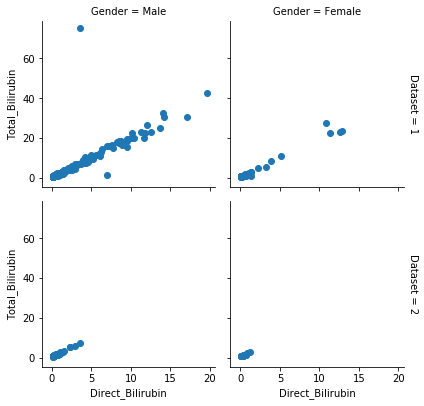

In [76]:
g = sns.FacetGrid(train, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin")
plt.subplots_adjust(top=0.9)

In [19]:
from sklearn.model_selection import train_test_split

In [71]:
train.head(1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Code
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1,1


In [20]:
X = train.iloc[:,[0,2,5,6,7,8,9,11]]
y = train['Dataset']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,random_state=1)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(372, 8)
(94, 8)
(372,)
(94,)


In [129]:
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.7714285714285715

#### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6285714285714286

#### Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

c:\users\sanch\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7857142857142857

#### KNN Algorithm

In [136]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7714285714285715

#### StateVectorMachine

In [137]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

c:\users\sanch\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8571428571428571

#### Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.45714285714285713

### State Vector Machine produced the best accuracy


In [139]:
X_test = test.iloc[:,[0,2,5,6,7,8,9,10]]

In [140]:
y_pred = svm.predict(X_test)

In [143]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [142]:
y_pred.shape

(117,)

In [144]:
test['Dataset'] = y_pred

In [146]:
test.to_csv('test.csv')